# K-Nearest-Neighbors

### Loading packages

In [2]:
# Import a bunch of libraries.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
# import data set
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

In [3]:
# Load the data, which is included in sklearn.
iris = load_iris()
target_names = iris.target_names
feature_names = iris.feature_names
print('Iris target names:', target_names[:2])
print('Iris feature names:', feature_names)
X, Y = iris.data, iris.target

# Shuffle the data, but make sure that the features and accompanying labels stay in sync.
np.random.seed(0)
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

# Split into train and test.
X_train, Y_train = X[:50], Y[:50]
X_dev, Y_dev = X[50:100], Y[50:100]
X_test, Y_test = X[100:], Y[100:]

Iris target names: ['setosa' 'versicolor']
Iris feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### Apply K-Nearest-Neighbors
We apply K-Nearest-Neighbors and use the dev data to find the best value for k.

In [4]:
k_vec = [1,2,3,4,5,6,7,8,9,10]
for k in k_vec:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    preds = knn.predict(X_dev)
    acc = np.mean(preds == Y_dev)
    print('Accuracy for %i is %f' %(k, acc))

Accuracy for 1 is 0.940000
Accuracy for 2 is 0.900000
Accuracy for 3 is 0.980000
Accuracy for 4 is 0.940000
Accuracy for 5 is 0.940000
Accuracy for 6 is 0.920000
Accuracy for 7 is 0.940000
Accuracy for 8 is 0.940000
Accuracy for 9 is 0.940000
Accuracy for 10 is 0.920000


We find the best accuracy 0.98 for k=3.

Let's try different metrics. Here is a link to some pre-implemented distance metrics. The default metric is the Euclidean metric.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html

In [5]:
k_vec = [1,2,3,4,5,6,7,8,9,10]
acc_vec = []
for k in k_vec:
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=3)
    knn.fit(X_train, Y_train)
    preds = knn.predict(X_dev)
    acc = np.mean(preds == Y_dev)
    acc_vec.append(acc)
    print('Accuracy for %i is %f' %(k, acc))
print('\nBest accuracy is %f with k=%i.\n\n' %(max(acc_vec), np.argmax(acc_vec)+1))
    
acc_vec = []
for k in k_vec:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(X_train, Y_train)
    preds = knn.predict(X_dev)
    acc = np.mean(preds == Y_dev)
    acc_vec.append(acc)
    print('Accuracy for %i is %f' %(k, acc))
print('\nBest accuracy is %f with k=%i.\n\n' %(max(acc_vec), np.argmax(acc_vec)+1))
    
acc_vec = []
for k in k_vec:
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
    knn.fit(X_train, Y_train)
    preds = knn.predict(X_dev)
    acc = np.mean(preds == Y_dev)
    acc_vec.append(acc)
    print('Accuracy for %i is %f' %(k, acc))
print('\nBest accuracy is %f with k=%i.' %(max(acc_vec), np.argmax(acc_vec)+1))
    
    

Accuracy for 1 is 0.940000
Accuracy for 2 is 0.900000
Accuracy for 3 is 0.980000
Accuracy for 4 is 0.940000
Accuracy for 5 is 0.940000
Accuracy for 6 is 0.920000
Accuracy for 7 is 0.960000
Accuracy for 8 is 0.940000
Accuracy for 9 is 0.940000
Accuracy for 10 is 0.920000

Best accuracy is 0.980000 with k=3.


Accuracy for 1 is 0.920000
Accuracy for 2 is 0.900000
Accuracy for 3 is 0.960000
Accuracy for 4 is 0.940000
Accuracy for 5 is 0.960000
Accuracy for 6 is 0.940000
Accuracy for 7 is 0.960000
Accuracy for 8 is 0.940000
Accuracy for 9 is 0.960000
Accuracy for 10 is 0.940000

Best accuracy is 0.960000 with k=3.


Accuracy for 1 is 0.960000
Accuracy for 2 is 0.940000
Accuracy for 3 is 0.980000
Accuracy for 4 is 0.900000
Accuracy for 5 is 0.900000
Accuracy for 6 is 0.900000
Accuracy for 7 is 0.900000
Accuracy for 8 is 0.900000
Accuracy for 9 is 0.920000
Accuracy for 10 is 0.920000

Best accuracy is 0.980000 with k=3.


### Check final error on test set 

We take the best KNN with the default metric and k=3 and calculate the test error.

In [31]:
nn = KNeighborsClassifier(n_neighbors=3)
knn.fit(np.concatenate((X_train, X_dev), axis=0), np.concatenate((Y_train, Y_dev), axis = 0))
preds = knn.predict(X_test)
acc = np.mean(preds == Y_test)
print('Accuracy for %i is %f' %(3, acc))

Accuracy for 3 is 0.980000


### Plotting the data

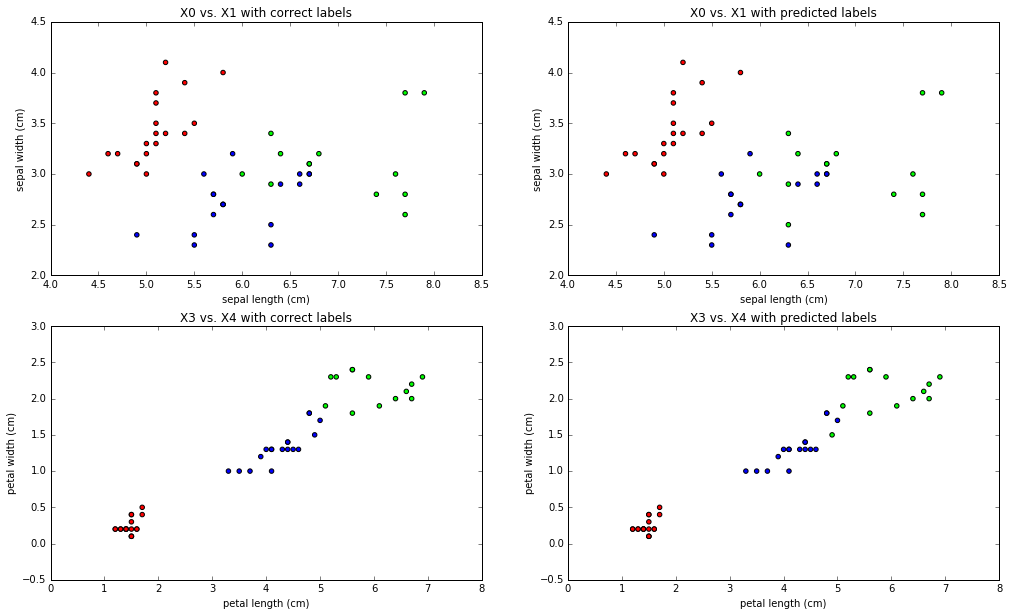

In [35]:
cm_bright = ListedColormap(['#FF0000', '#0000FF', '#00FF00'])

fig = plt.figure(figsize=(17,10))
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(X_test[:,0], X_test[:,1], c = Y_test, cmap=cm_bright)
ax1.set_title("X0 vs. X1 with correct labels")
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(X_test[:,0], X_test[:,1], c = preds, cmap=cm_bright)
ax2.set_title("X0 vs. X1 with predicted labels")
ax2.set_xlabel(feature_names[0])
ax2.set_ylabel(feature_names[1])

ax3 = fig.add_subplot(2,2,3)
ax3.scatter(X_test[:,2], X_test[:,3], c = Y_test, cmap=cm_bright)
ax3.set_title("X3 vs. X4 with correct labels")
ax3.set_xlabel(feature_names[2])
ax3.set_ylabel(feature_names[3])

ax4 = fig.add_subplot(2,2,4)
ax4.scatter(X_test[:,2], X_test[:,3], c = preds, cmap=cm_bright)
ax4.set_title("X3 vs. X4 with predicted labels")
ax4.set_xlabel(feature_names[2])
ax4.set_ylabel(feature_names[3])

plt.show()